# Image Segmentation - PSPNet
### In this exercise you’ll need to explain <a href="https://arxiv.org/pdf/1612.01105.pdf">Pyramid Scene Parsing Network architecture</a>

The PSPNet architechture takes into account the global context of the image to predict the local level predictions hence gives better performance on benchmark datasets like PASCAL VOC 2012 and cityscapes. 
<br>The model was needed because FCN based pixel classifiers were not able to capture the context of the whole image.

Based on DeepLab, PSPNet exploits the pyramid pooling module to aggregate
the image global context information with an auxiliary loss.<br> Since DeepLab provides
two versions of the model adapted from VGG-16 and ResNet-101, <br>PSPNet can also be
applied to VGG and ResNet based network structures, respectively

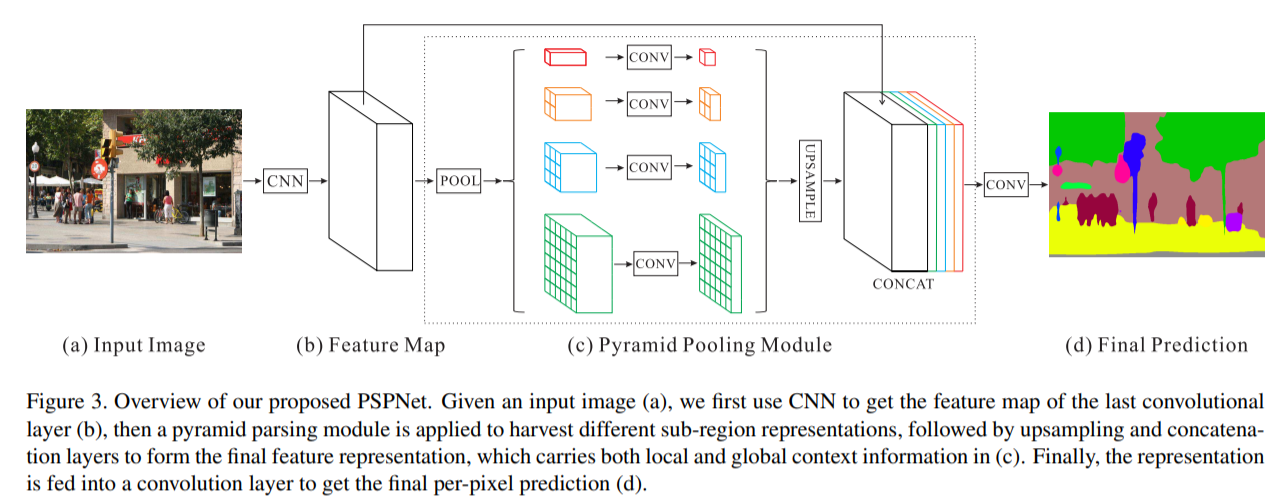


## 1. Explain all the different parts of the architecture. 

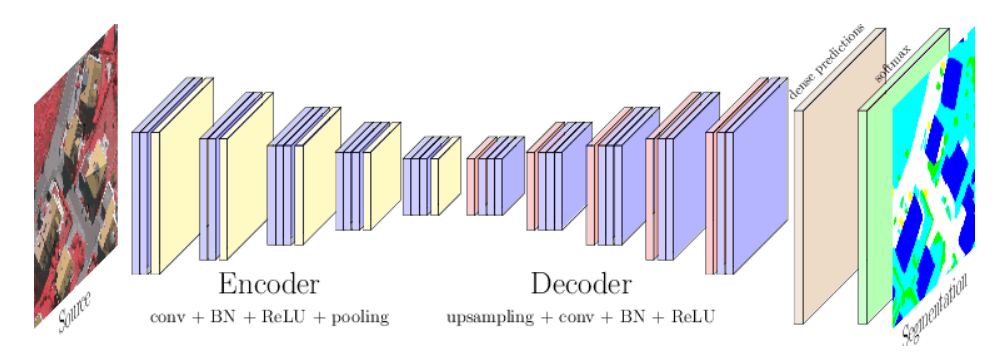

 **Pyramid Scene Parsing Network architecture** contains two parts, i.e an `Encoder` and a `Decoder`. The `Encoder` is responsible for the extracting out features from the image, the `decoder` is the one which predicts the class of the pixel at the end. 

 The PSPNet `encoder` contains the CNN backbone with `dilated convolutions` along with the `pyramid pooling` module.
 
 
 After the `encoder` has extracted out features of the image, it is the turn of the `decoder` to take those features and convert them into predictions by passing them into its layers. The `decoder` is just another network which takes in features and results into predictions.

## What are the different layers of the network? 

1. Given an input image (The input image is cropped and centered as necessary before training or prediction.)

2. Use CNN to get the feature map of the last convolutional layer (One more important point before we visualize the actual convolution operation. To perform multiple convolutions on an input, each using a different filter and resulting in a distinct feature map. Then stack all these feature maps together and that becomes the final output of the convolution layer.)

3. A pyramid parsing module is applied to harvest different sub-region representations, followed by upsampling and concatenation layers to form the final feature representation, which carries both local and global context information . (max pooling to reduce the dimensionality. This enables us to reduce the number of parameters, which both shortens the training time and combats overfitting. Pooling layers downsample each feature map independently, reducing the height and width, keeping the depth intact.)

4. The representation is fed into a convolution layer to get the final per-pixel prediction 

## What is the final MIoU score?


**sourse link:**<br>https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanIoU<br>

    Mean Intersection-Over-Union is a common evaluation metric for semantic image segmentation, which first computes the IOU for each semantic class and then computes the average over classes. IOU is defined as follows: 

$$IOU = true positive / (true positive + false positive + false negative)$$. 

    The predictions are accumulated in a confusion matrix, weighted by sample_weight and the metric is then calculated from it.



## 2. What is the use of Pyramid and Upsample layers here?


**sourse link:**<br>https://developers.arcgis.com/python/guide/how-pspnet-works/<br>https://towardsdatascience.com/review-pspnet-winner-in-ilsvrc-2016-semantic-segmentation-scene-parsing-e089e5df177d

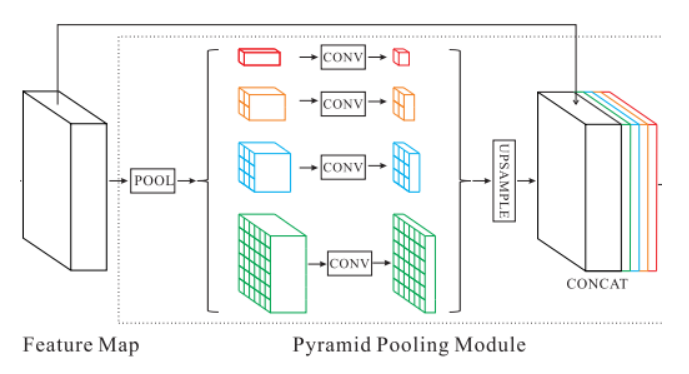

The `pyramid pooling module` is the main part of this model as it helps the model to capture the global context in the image which helps it to classify the pixels based on the global information present in the image.

The feature map from the backbone is pooled at different sizes and then passed through a convolution layer and after which `upsampling` takes place on the pooled features to make them the same size as of the original feature map. Finally, the `upsampled maps` are concatenated with the original feature map to be passed to the `decoder`. This technique fuses the features different scales hence aggregating the overall context.

For example in the picture above  (from the paper), the four colours represent different scales which are 6, 3, 2, and 1 for colours green, blue, orange and red respectively. The feature map is pooled at these scales after which they are convolved with 1x1 filters to reduce the feature depth. Then all of these features are then upsampled at the size of the feature map and are concatenated.

The PSPNet model is not a complete segmentation model in itself, it is just an encoder, which means it is just half of what is required for image segmentation. The most common decoders that are found in various implementations of PSPNet is a convolution layer followed by a 8x bilinear-upsampling.

## 3. What is the Dilated Network Strategy?


In the last layers of the backbone, we replace the traditional convolutional layers with Dilated convolution layers, which helps in increasing the receptive field. This Dilated convolution layers are placed in the last two blocks of the backbone. Hence the feature recieved at the end of the backbone contains richer features

The receptive field for dilated convolution is larger as compared to the standard convolution. The size of the receptive field indicates how much context information we use. In PSPNet, the last two blocks of the backbone have dilation values 2 and 4 respectively.

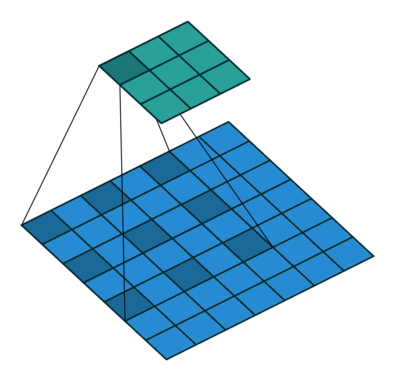

## 4. What is 1x1 Convolution? 

**sourse link:**<br>https://machinelearningmastery.com/introduction-to-1x1-convolutions-to-reduce-the-complexity-of-convolutional-neural-networks/<br>

 A problem with deep convolutional neural networks is that the number of feature maps often increases with the depth of the network. This problem can result in a dramatic increase in the number of parameters and computation required when larger filter sizes are used


To address this problem, a 1×1 convolutional layer can be used that offers a channel-wise pooling, often called feature map pooling or a projection layer. This simple technique can be used for dimensionality reduction, decreasing the number of feature maps whilst retaining their salient features. It can also be used directly to create a one-to-one projection of the feature maps to pool features across channels or to increase the number of feature maps, such as after traditional pooling layers. 
 
 
 For example in the picture above  from Q2, the four colours represent different scales which are 6, 3, 2, and 1 for colours green, blue, orange and red respectively. 

The feature map is pooled at these scales after which they are convolved with 1x1 filters to reduce the feature depth. Then all of these features are then upsampled at the size of the feature map and are concatenated. The 1x1 feature is the most coarse pooled feature map as it captures all the information in just 1x1 spatial location, whereas as the spatial resolution increases, the high resolution features are also taken in account as in the case of 6x6 pyramid size.

## What is the purpose of this?

 A rule of thumb is that the if the pyramid size is small i.e ~1 or 2, the model will capture the low resolution and bigger features whereas if the the pyramid size is bigger i.e ~6-8, the model will be able to capture high resolution features.